In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from lifelines import KaplanMeierFitter
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
import shap

In [2]:
# Load the data into a DataFrame
data = pd.read_csv(r"C:\Users\Rahi\Downloads\Attrition data.csv")

In [3]:
# Display the first few rows of the dataset
print(data.head())

   Age Attrition     BusinessTravel              Department  DistanceFromHome  \
0   51        No      Travel_Rarely                   Sales                 6   
1   31       Yes  Travel_Frequently  Research & Development                10   
2   32        No  Travel_Frequently  Research & Development                17   
3   38        No         Non-Travel  Research & Development                 2   
4   32        No      Travel_Rarely  Research & Development                10   

   Education EducationField  EmployeeCount  Gender  JobLevel  ...  \
0          2  Life Sciences              1  Female         1  ...   
1          1  Life Sciences              1  Female         1  ...   
2          4          Other              1    Male         4  ...   
3          5  Life Sciences              1    Male         3  ...   
4          1        Medical              1    Male         1  ...   

  TotalWorkingYears TrainingTimesLastYear  YearsAtCompany  \
0               1.0                  

In [6]:
# Summary statistics
print(data.describe())

               Age  DistanceFromHome    Education  EmployeeCount     JobLevel  \
count  4410.000000       4410.000000  4410.000000         4410.0  4410.000000   
mean     36.923810          9.192517     2.912925            1.0     2.063946   
std       9.133301          8.105026     1.023933            0.0     1.106689   
min      18.000000          1.000000     1.000000            1.0     1.000000   
25%      30.000000          2.000000     2.000000            1.0     1.000000   
50%      36.000000          7.000000     3.000000            1.0     2.000000   
75%      43.000000         14.000000     4.000000            1.0     3.000000   
max      60.000000         29.000000     5.000000            1.0     5.000000   

       MonthlyIncome  NumCompaniesWorked  PercentSalaryHike  StandardHours  \
count    4410.000000         4391.000000        4410.000000         4410.0   
mean    65029.312925            2.694830          15.209524            8.0   
std     47068.888559            2.49

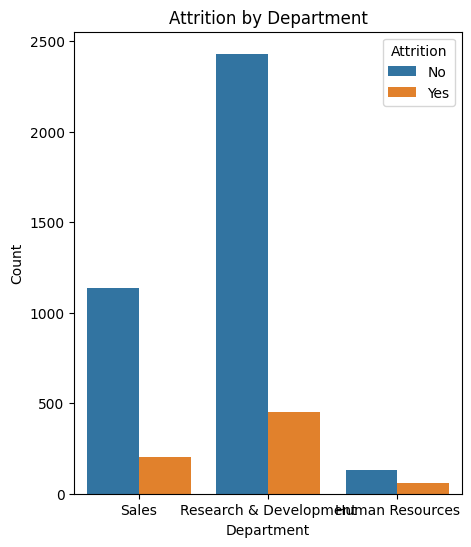

In [8]:
# Attrition by Department
plt.figure(figsize=(5, 6))
sns.countplot(x='Department', hue='Attrition', data=data)
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.show()

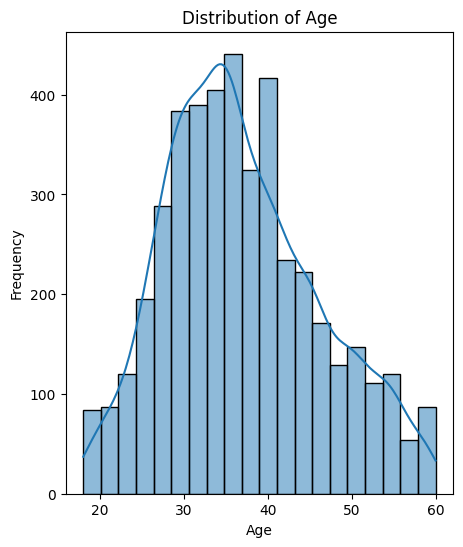

In [9]:
# Distribution of Age
plt.figure(figsize=(5, 6))
sns.histplot(data['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


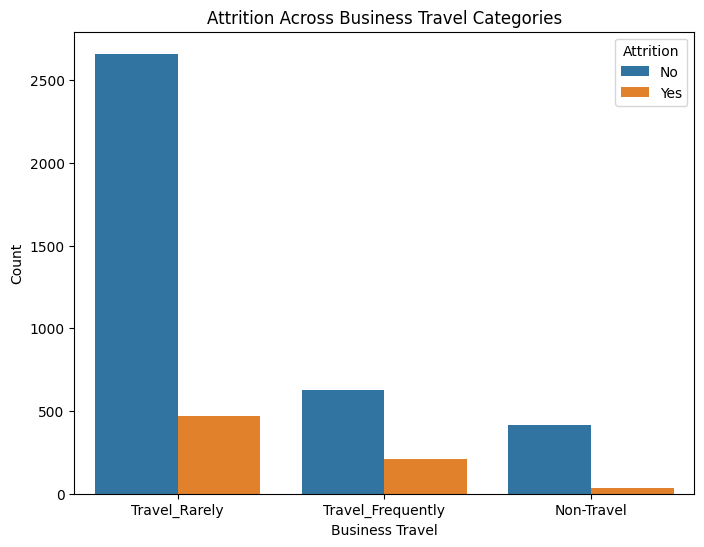

In [10]:
# Check the attrition rate across different categories of 'BusinessTravel'
plt.figure(figsize=(8, 6))
sns.countplot(x='BusinessTravel', hue='Attrition', data=data)
plt.title('Attrition Across Business Travel Categories')
plt.xlabel('Business Travel')
plt.ylabel('Count')
plt.legend(title='Attrition')
plt.show()

We see that employee who travel rarely have the lowest attrition.

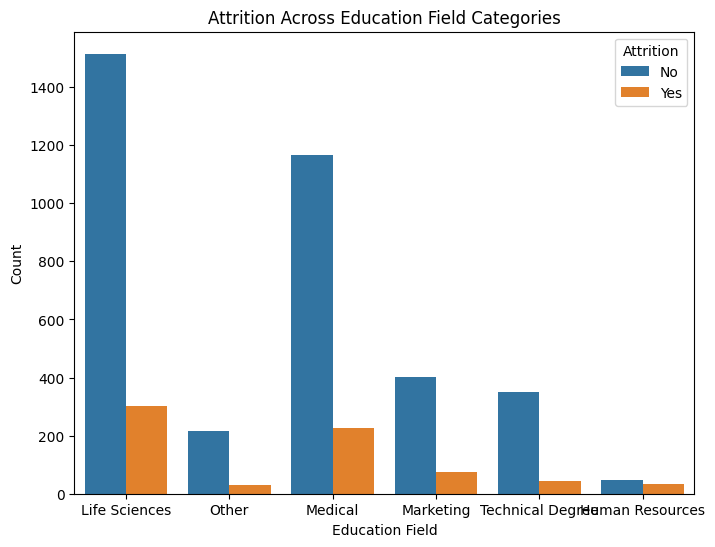

In [11]:
# Check the attrition rate across different categories of 'Education Field'
plt.figure(figsize=(8, 6))
sns.countplot(x='EducationField', hue='Attrition', data=data)
plt.title('Attrition Across Education Field Categories')
plt.xlabel('Education Field')
plt.ylabel('Count')
plt.legend(title='Attrition')
plt.show()

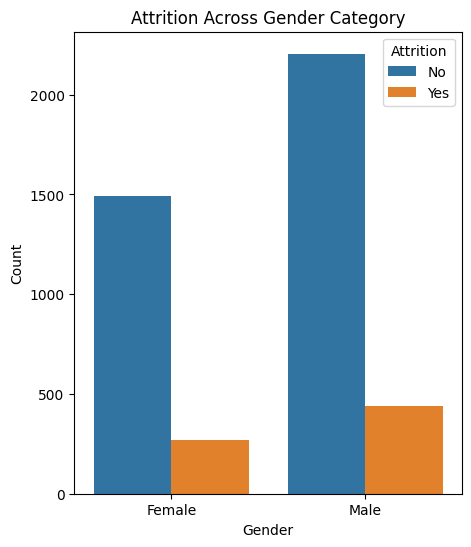

In [12]:
# Check the attrition rate across different categories of 'Gender'
plt.figure(figsize=(5, 6))
sns.countplot(x='Gender', hue='Attrition', data=data)
plt.title('Attrition Across Gender Category')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Attrition')
plt.show()

Across gender, males have low attrition.

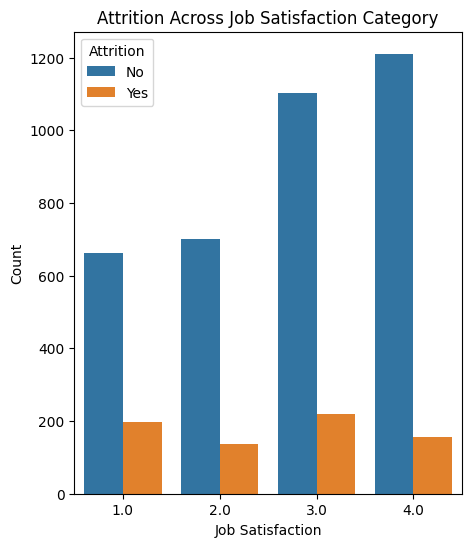

In [14]:
# Check the attrition rate across different categories of 'Job Satisfaction'
plt.figure(figsize=(5, 6))
sns.countplot(x='JobSatisfaction', hue='Attrition', data=data)
plt.title('Attrition Across Job Satisfaction Category')
plt.xlabel('Job Satisfaction')
plt.ylabel('Count')
plt.legend(title='Attrition')
plt.show()

we see that as the job level increases, attrition decreases.

In [15]:
# Encoding categorical variables

label_encoder = LabelEncoder()

data['MaritalStatus_Encoded'] = label_encoder.fit_transform(data['MaritalStatus'])
data['Attrition_Encoded'] = label_encoder.fit_transform(data['Attrition'])
data['Gender_Encoded'] = label_encoder.fit_transform(data['Gender'])
data['BusinessTravel_Encoded'] = label_encoder.fit_transform(data['BusinessTravel'])


# Display the encoded values
print(data[['MaritalStatus', 'MaritalStatus_Encoded']].head())
print(data[['Attrition', 'Attrition_Encoded']].head())
print(data[['Gender', 'Gender_Encoded']].head())
print(data[['BusinessTravel', 'BusinessTravel_Encoded']].head())


  MaritalStatus  MaritalStatus_Encoded
0       Married                      1
1        Single                      2
2       Married                      1
3       Married                      1
4        Single                      2
  Attrition  Attrition_Encoded
0        No                  0
1       Yes                  1
2        No                  0
3        No                  0
4        No                  0
   Gender  Gender_Encoded
0  Female               0
1  Female               0
2    Male               1
3    Male               1
4    Male               1
      BusinessTravel  BusinessTravel_Encoded
0      Travel_Rarely                       2
1  Travel_Frequently                       1
2  Travel_Frequently                       1
3         Non-Travel                       0
4      Travel_Rarely                       2


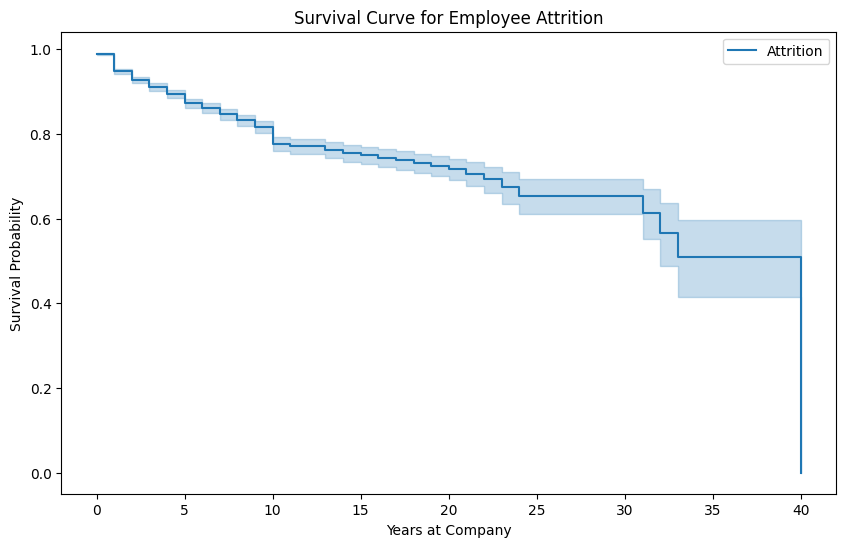

In [19]:
## Survival Analysis

# Create a Kaplan-Meier estimator
kmf = KaplanMeierFitter()

# Fit the Kaplan-Meier estimator to the data
kmf.fit(data['YearsAtCompany'], event_observed=data['Attrition'] == 'Yes', label='Attrition')

# Plot the survival curve
plt.figure(figsize=(10, 6))
kmf.plot()
plt.title('Survival Curve for Employee Attrition')
plt.xlabel('Years at Company')
plt.ylabel('Survival Probability')
plt.show()

In [20]:
# Compute median survival time
median_survival_time = kmf.median_survival_time_

# Compute survival probabilities at specific time points
survival_probabilities = kmf.predict([1, 2, 3, 4, 5])  # Specify time points of interest

# Print results
print("Median Survival Time:", median_survival_time)
print("Survival Probabilities at Specific Time Points:", survival_probabilities)

Median Survival Time: 40.0
Survival Probabilities at Specific Time Points: 1    0.948192
2    0.927792
3    0.911342
4    0.894026
5    0.872931
Name: Attrition, dtype: float64


The median survival time for employees in the dataset is 40.0 units of time (e.g., months, years). The provided survival probabilities suggest that approximately 94.8%, 92.8%, 91.1%, 89.4%, and 87.3% of employees are expected to remain in the organization after 1, 2, 3, 4, and 5 units of time, respectively.

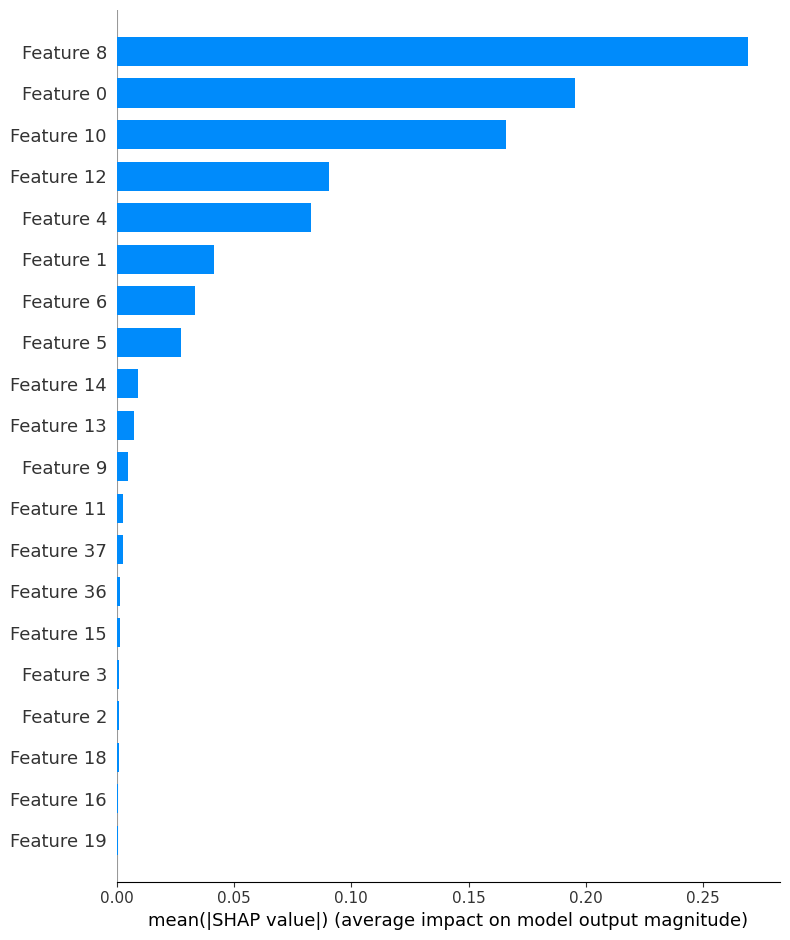

In [29]:
## Interpreting Employee Attrition Patterns with SHAP Values

# Select relevant features and target variable
features = ['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'Gender',
            'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
            'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany',
            'YearsSinceLastPromotion', 'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction',
            'WorkLifeBalance', 'JobInvolvement', 'PerformanceRating']
target = 'Attrition'

# Encode categorical variables
data_encoded = pd.get_dummies(data[features], drop_first=True)
data_encoded[target] = data[target]

# Split the data into features (X) and target variable (y)
X = data_encoded.drop(target, axis=1)
y = data_encoded[target]

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values in the features
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_imputed, y_train)

# Explain the model predictions using SHAP values
explainer = shap.Explainer(model, X_train_imputed)
shap_values = explainer(X_test_imputed)

# Visualize the SHAP values
shap.summary_plot(shap_values, X_test_imputed, plot_type='bar')
plt.show()


The graph illustrates the contribution of different features to the prediction of employee attrition using SHAP (SHapley Additive exPlanations) values. Initial features with high SHAP values indicate their significant impact on predicting attrition, suggesting that factors such as age, job level, training time and department play crucial roles in determining attrition patterns within the workforce.